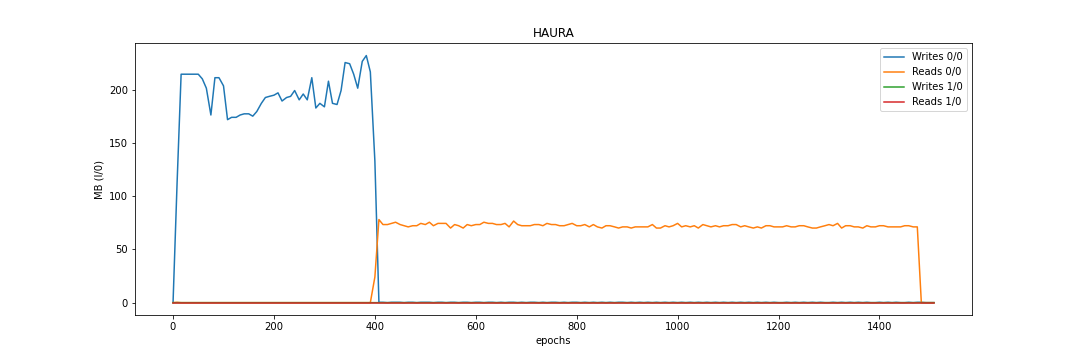

<Figure size 1080x360 with 0 Axes>

In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))

def subtract_last_index(array):
    last_val = 0
    for index, value in enumerate(array):
        array[index] = value - last_val
        last_val = value
    array[0] = 0

def subtract_first_index(array):
    first_val = array[0]
    for index, value in enumerate(array):
        array[index] = value -first_val

data = []

fs = open('betree-metrics.jsonl', 'r')
line_number = 0
  
while True:
    line_number += 1
  
    # Get next line from file
    line = fs.readline()
  
    # if line is empty
    # end of file is reached
    if not line:
        break
        
    json_object = json.loads(line)

    data.append(json_object);
    
# print("{}".format(data))
  
fs.close()

df = pd.DataFrame(data)

epoch = [temp['epoch_ms'] for temp in data]

subtract_first_index(epoch)
epoch = np.divide(epoch, 60)
epoch = epoch.astype(int)

for x in range(4):
    for y in range(4):
        writes = np.array([])
        reads = np.array([])
        for temp in data:
            if x >= len(temp['storage']['tiers']) or y >= len(temp['storage']['tiers'][x]['vdevs']):
                continue

            writes = np.append(writes, temp['storage']['tiers'][x]['vdevs'][y]['written'])
            reads = np.append(reads, temp['storage']['tiers'][x]['vdevs'][y]['read'])

        if len(writes) > 0:
            subtract_last_index(writes)
            subtract_last_index(reads)

            writes = np.divide(writes, 1024)
            reads = np.divide(reads, 1024)
            
            plt.plot(epoch, writes, label = "Writes {}/{}".format(x,y))
            plt.plot(epoch, reads, label = "Reads {}/{}".format(x,y))
plt.legend()
plt.xlabel("epochs")  # add X-axis label
plt.ylabel("MB (I/0)")  # add Y-axis label
plt.title("HAURA")  # add title
#plt.xticks(epoch, rotation = 90)
plt.show()
#plt.savefig('pmem.png')